# Student Grade Prediction

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

#### Load Dataset

In [4]:
df=pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Check For Null values

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Dropping All Null Values

In [6]:
df.dropna(inplace=True)

#### Displaying Correlation of Attributes With G3

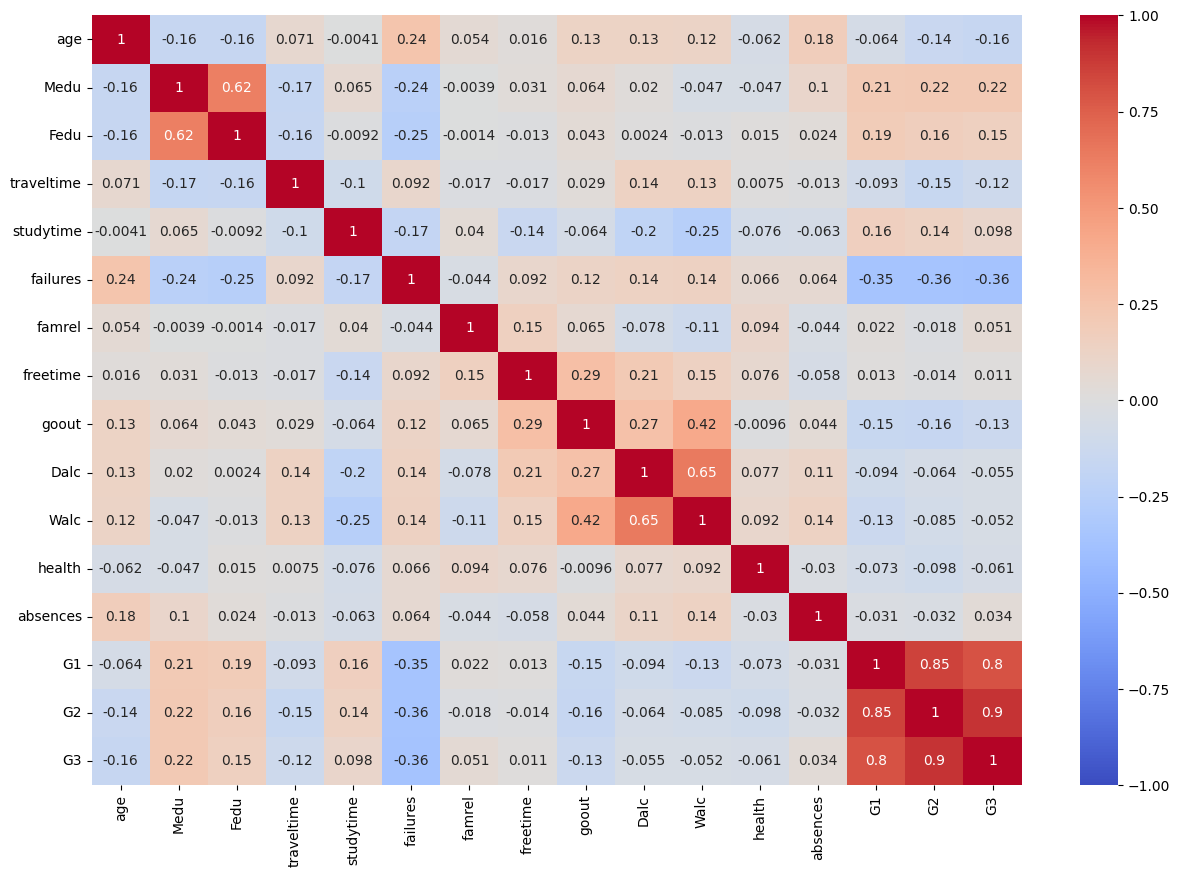

In [7]:
# selecting numeric values
df_num=df.select_dtypes(include=[float, int])

# figure size
f, ax = plt.subplots(figsize=(15, 10))

# correlation matrix
corr = df_num.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
plt.show()

#### Selecting Input Features

In [31]:
# From above heatmap we can see that the attributes most correlated to G3 are G1, G2, Medu, and failures.
# So we choose them as input features and convert them to numpy array.

features = df[['G1', 'G2', 'Medu', 'failures']].values
target = df['G3'].values
features.shape, target.shape

#### Splitting Dataset Into Training and Testing Sets

In [32]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

#### Function to Normalize Training and Testing Sets to Have Same Scale

In [33]:
def normalize(features_train, features_test):
    mean = np.mean(features_train, axis=0)
    std = np.std(features_train, axis=0)
    features_train_normalized = (features_train - mean) / std
    features_test_normalized = (features_test - mean) / std
    
    return features_train_normalized, features_test_normalized
    
features_train_norm, features_test_norm = normalize(features_train, features_test)

#### Adding Bias / Intercept Term to Model

In [34]:
features_train_norm = np.hstack((np.ones((features_train_norm.shape[0], 1)), features_train_norm))
features_test_norm = np.hstack((np.ones((features_test_norm.shape[0], 1)), features_test_norm))

#### Function to Calculate Cost of Linear Regression Model

In [35]:
def cost(features, target, theta):
    num_of_samples = len(target) 
    predictions = features.dot(theta)
    cost = 1 / 2 * num_of_samples * np.sum((predictions - target) ** 2)
    return cost

#### Function to Perform Gradient Descent to Optimize Model Parameters

In [36]:
def gradient_descent(features, target, theta, alpha, num_of_iterations):
    num_of_samples = len(target)
    cost_history = np.zeros(num_of_iterations)

    for i in range(num_of_iterations):
        predictions = features.dot(theta)
        loss = predictions - target
        theta = theta - (alpha * (features.T.dot(loss))) / num_of_samples
        cost_history[i] = cost(features, target, theta)

    return theta, cost_history

#### Function for Predicting Grade for New Data Points

In [37]:
def predict_new_data(new_data, features_train, theta):
    i = 0
    for col in range(features_train.shape[1]):
        col_mean = np.mean(features_train[:, col])
        col_std = np.std(features_train[:, col])
        new_data[i] = (new_data[i] - col_mean) / col_std
        i += 1
    new_data = np.insert(new_data, 0, 1)
    target_predict = new_data.dot(theta)
    return target_predict

In [38]:
# hyperparameters of gradient descent function

alpha = 0.01  #learning rate
num_of_iterations = 1000

#theta -> vector of parameters (weights) that will be learned by the model during training.
theta = np.zeros(features_train_norm.shape[1])
theta, cost_history = gradient_descent(features_train_norm, target_train, theta, alpha, num_of_iterations)

print('Equation \t=> Y = a + bx')
print('a \t\t=> Bias / Intercept Term')
print('b \t\t=> Coefficient of Feature\n')

#theta contains bias term at index 0 and coeficients for each feature
print(f'Theta: {theta}')

#### Plotting Line Graph to Visualize the Cost Function Against the No. of Iterations.

In [39]:
sns.lineplot(data = cost_history)
plt.title('Cost against Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [40]:
#theta is used to predict the target values for the testing data
target_predictions = features_test_norm.dot(theta)

#### Plotting Actual and Predicted Values in Scatter Plot

In [41]:
sns.scatterplot(x = target_test, y = target_predictions)
plt.plot(target_test, target_test, color='purple')
plt.title('Predicted VS Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

##

In [42]:
mse = np.mean((target_test - target_predictions) ** 2)
print('Mean Squared Error : ', mse)

#### Function to Perform R-Squared Score of Model 

In [43]:
def r2_score(y,y_upd):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((y-y_upd)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [44]:
r2_score(target_test, target_predictions)

#### Predicting Final Grades on New Data

In [45]:
data1 = np.array([6, 10, 3, 0])
data2 = np.array([12,15,3,2])

predicted_grade1 = predict_new_data(data1, features_train, theta)
predicted_grade2 = predict_new_data(data2, features_train, theta)

print("Predicted Grade 1 :", predicted_grade1)
print("Predicted Grade 2 :", predicted_grade2)

In [46]:
data={
    "theta" : theta,
    "features_train" : features_train,
    "predict_new_data" : predict_new_data
}

In [47]:
with open('student_grade_prediction_v3.2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [48]:
pickled_model = pickle.load(open('./student_grade_prediction_v3.1.pkl', 'rb'))
new_data = np.array([6, 10, 3, 0])
pickled_model

In [49]:

prediction = predict_new_data(new_data, pickled_model['features_train'], pickled_model['theta'])
print("Predicted Grade:", prediction)